In [126]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import os

In [127]:
from utils import join_data, hervy_dist, minutes_convert, train_test, haversine,plt_map

In [128]:
dst_folder = os.path.join(os.getcwd(),"Processed_Data")

In [129]:
df = join_data(dst_folder)

In [130]:
df["Distance"]=df.apply(lambda x : haversine([x.Latitude, x.Longitude ], [x.Latitude_1, x.Longitude_1]), axis=1)

In [131]:
df.columns

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Occupancy', 'Date', 'Hour',
       'Day', 'Latitude_1', 'Longitude_1', 'Occupancy_1', 'Date_1', 'Hour_1',
       'Day_1', 'Cab_Name', 'Distance'],
      dtype='object')

In [132]:
df = df[['Latitude', 'Longitude', 'Occupancy',  'Latitude_1', 'Longitude_1', 'Cab_Name', 'Distance']]

In [133]:
df_ocupancy_0 = df.groupby(by="Cab_Name").mean()

In [134]:
df_ocupancy_0 = df_ocupancy_0.reset_index()

In [135]:
df_0 = df_ocupancy_0[['Latitude', 'Longitude', 'Occupancy',  'Latitude_1', 'Longitude_1',  'Distance']]

In [136]:
df_0

,Latitude,Longitude,Occupancy,Latitude_1,Longitude_1,Distance
0,37.774981,-122.416824,0.0,37.780372,-122.417250,1909.907062
1,37.772030,-122.415377,0.0,37.772467,-122.416575,2480.419905
2,37.763451,-122.407015,0.0,37.768477,-122.414265,4630.597447
3,37.769745,-122.415651,0.0,37.774637,-122.417131,2250.363912
4,37.773541,-122.414235,0.0,37.779071,-122.416477,2177.038653
...,...,...,...,...,...,...
532,37.775805,-122.416693,0.0,37.779528,-122.417489,1501.712950
533,37.777243,-122.417583,0.0,37.780879,-122.417826,1707.014182
534,37.765853,-122.412858,0.0,37.767437,-122.412687,3513.317588
535,37.772379,-122.415946,0.0,37.772967,-122.418068,2222.160195


In [137]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

In [140]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters=4,init='k-means++', n_init=10, max_iter=300, tol=0.0001)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_0)
 
print(label)

[3 1 2 3 3 3 3 1 1 1 3 1 3 3 2 2 3 3 2 1 3 1 3 3 1 3 3 2 3 3 3 1 2 2 1 1 3
 3 3 1 1 3 1 1 3 0 3 3 3 3 3 1 1 3 1 3 1 3 0 2 3 3 1 3 1 1 1 3 3 3 3 3 1 3
 1 1 3 3 1 3 1 2 2 3 1 3 2 1 2 0 3 3 1 2 1 3 2 3 3 1 3 3 3 3 3 3 3 3 3 2 3
 2 2 2 1 2 3 3 3 1 2 1 3 1 1 3 1 1 1 3 3 3 1 3 3 1 3 3 1 1 1 1 3 1 3 2 1 1
 3 3 1 1 3 3 3 2 3 1 1 3 3 2 1 0 1 3 3 3 1 1 3 2 1 3 3 1 2 3 3 3 3 1 3 3 1
 3 3 3 3 3 1 3 1 3 1 1 1 2 3 3 3 3 1 1 3 3 3 3 3 1 3 1 3 3 3 3 1 3 3 2 2 3
 3 1 3 0 0 3 3 3 2 3 1 3 1 1 1 1 1 1 3 3 3 2 3 1 3 2 3 0 3 1 3 3 1 3 1 1 2
 3 1 3 3 1 1 0 1 3 3 1 3 3 3 1 1 3 1 1 3 1 3 1 1 2 1 3 1 3 2 3 1 3 3 1 3 1
 3 1 3 3 1 3 2 2 1 1 3 2 3 3 3 1 1 3 1 1 3 1 1 1 3 3 3 1 3 1 0 1 3 1 3 1 3
 3 2 3 1 3 1 1 1 3 1 1 2 3 3 3 1 1 1 3 3 1 3 3 3 3 1 3 3 3 2 1 2 3 3 3 3 2
 3 3 2 3 3 1 1 2 1 0 3 3 1 1 1 3 1 3 3 3 1 3 3 3 3 3 1 1 3 3 3 3 1 1 1 3 3
 2 0 3 1 3 1 3 1 3 1 3 3 1 2 3 3 3 3 3 1 3 3 3 1 1 3 3 3 0 3 3 3 1 3 3 2 3
 1 1 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 2 3 1 3 1 2 1 1 3 1 1 1 3 3
 1 3 1 3 3 1 1 1 1 3 1 3 

In [141]:
set(label)

{0, 1, 2, 3}

In [142]:
df_ocupancy_0["label"]= label

In [143]:
df_ocupancy_0.groupby("label").mean()

,Latitude,Longitude,Occupancy,Latitude_1,Longitude_1,Distance
label,,,,,,
0,37.754802,-122.407011,0.0,37.746185,-122.409009,5856.173741
1,37.770705,-122.415761,0.0,37.775231,-122.416927,2630.269311
2,37.763580,-122.411526,0.0,37.761885,-122.412659,3943.959648
3,37.774654,-122.417420,0.0,37.779356,-122.417706,1978.497525


In [144]:
df_ocupancy_0.groupby("label").count()

,Cab_Name,Latitude,Longitude,Occupancy,Latitude_1,Longitude_1,Distance
label,,,,,,,
0,14,14,14,14,14,14,14
1,182,182,182,182,182,182,182
2,53,53,53,53,53,53,53
3,288,288,288,288,288,288,288


C:\Users\Reset me please\Desktop\Vibhu_Assignment\utils.py:234: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  crs=CRS('EPSG:4326').to_proj4()


Plot


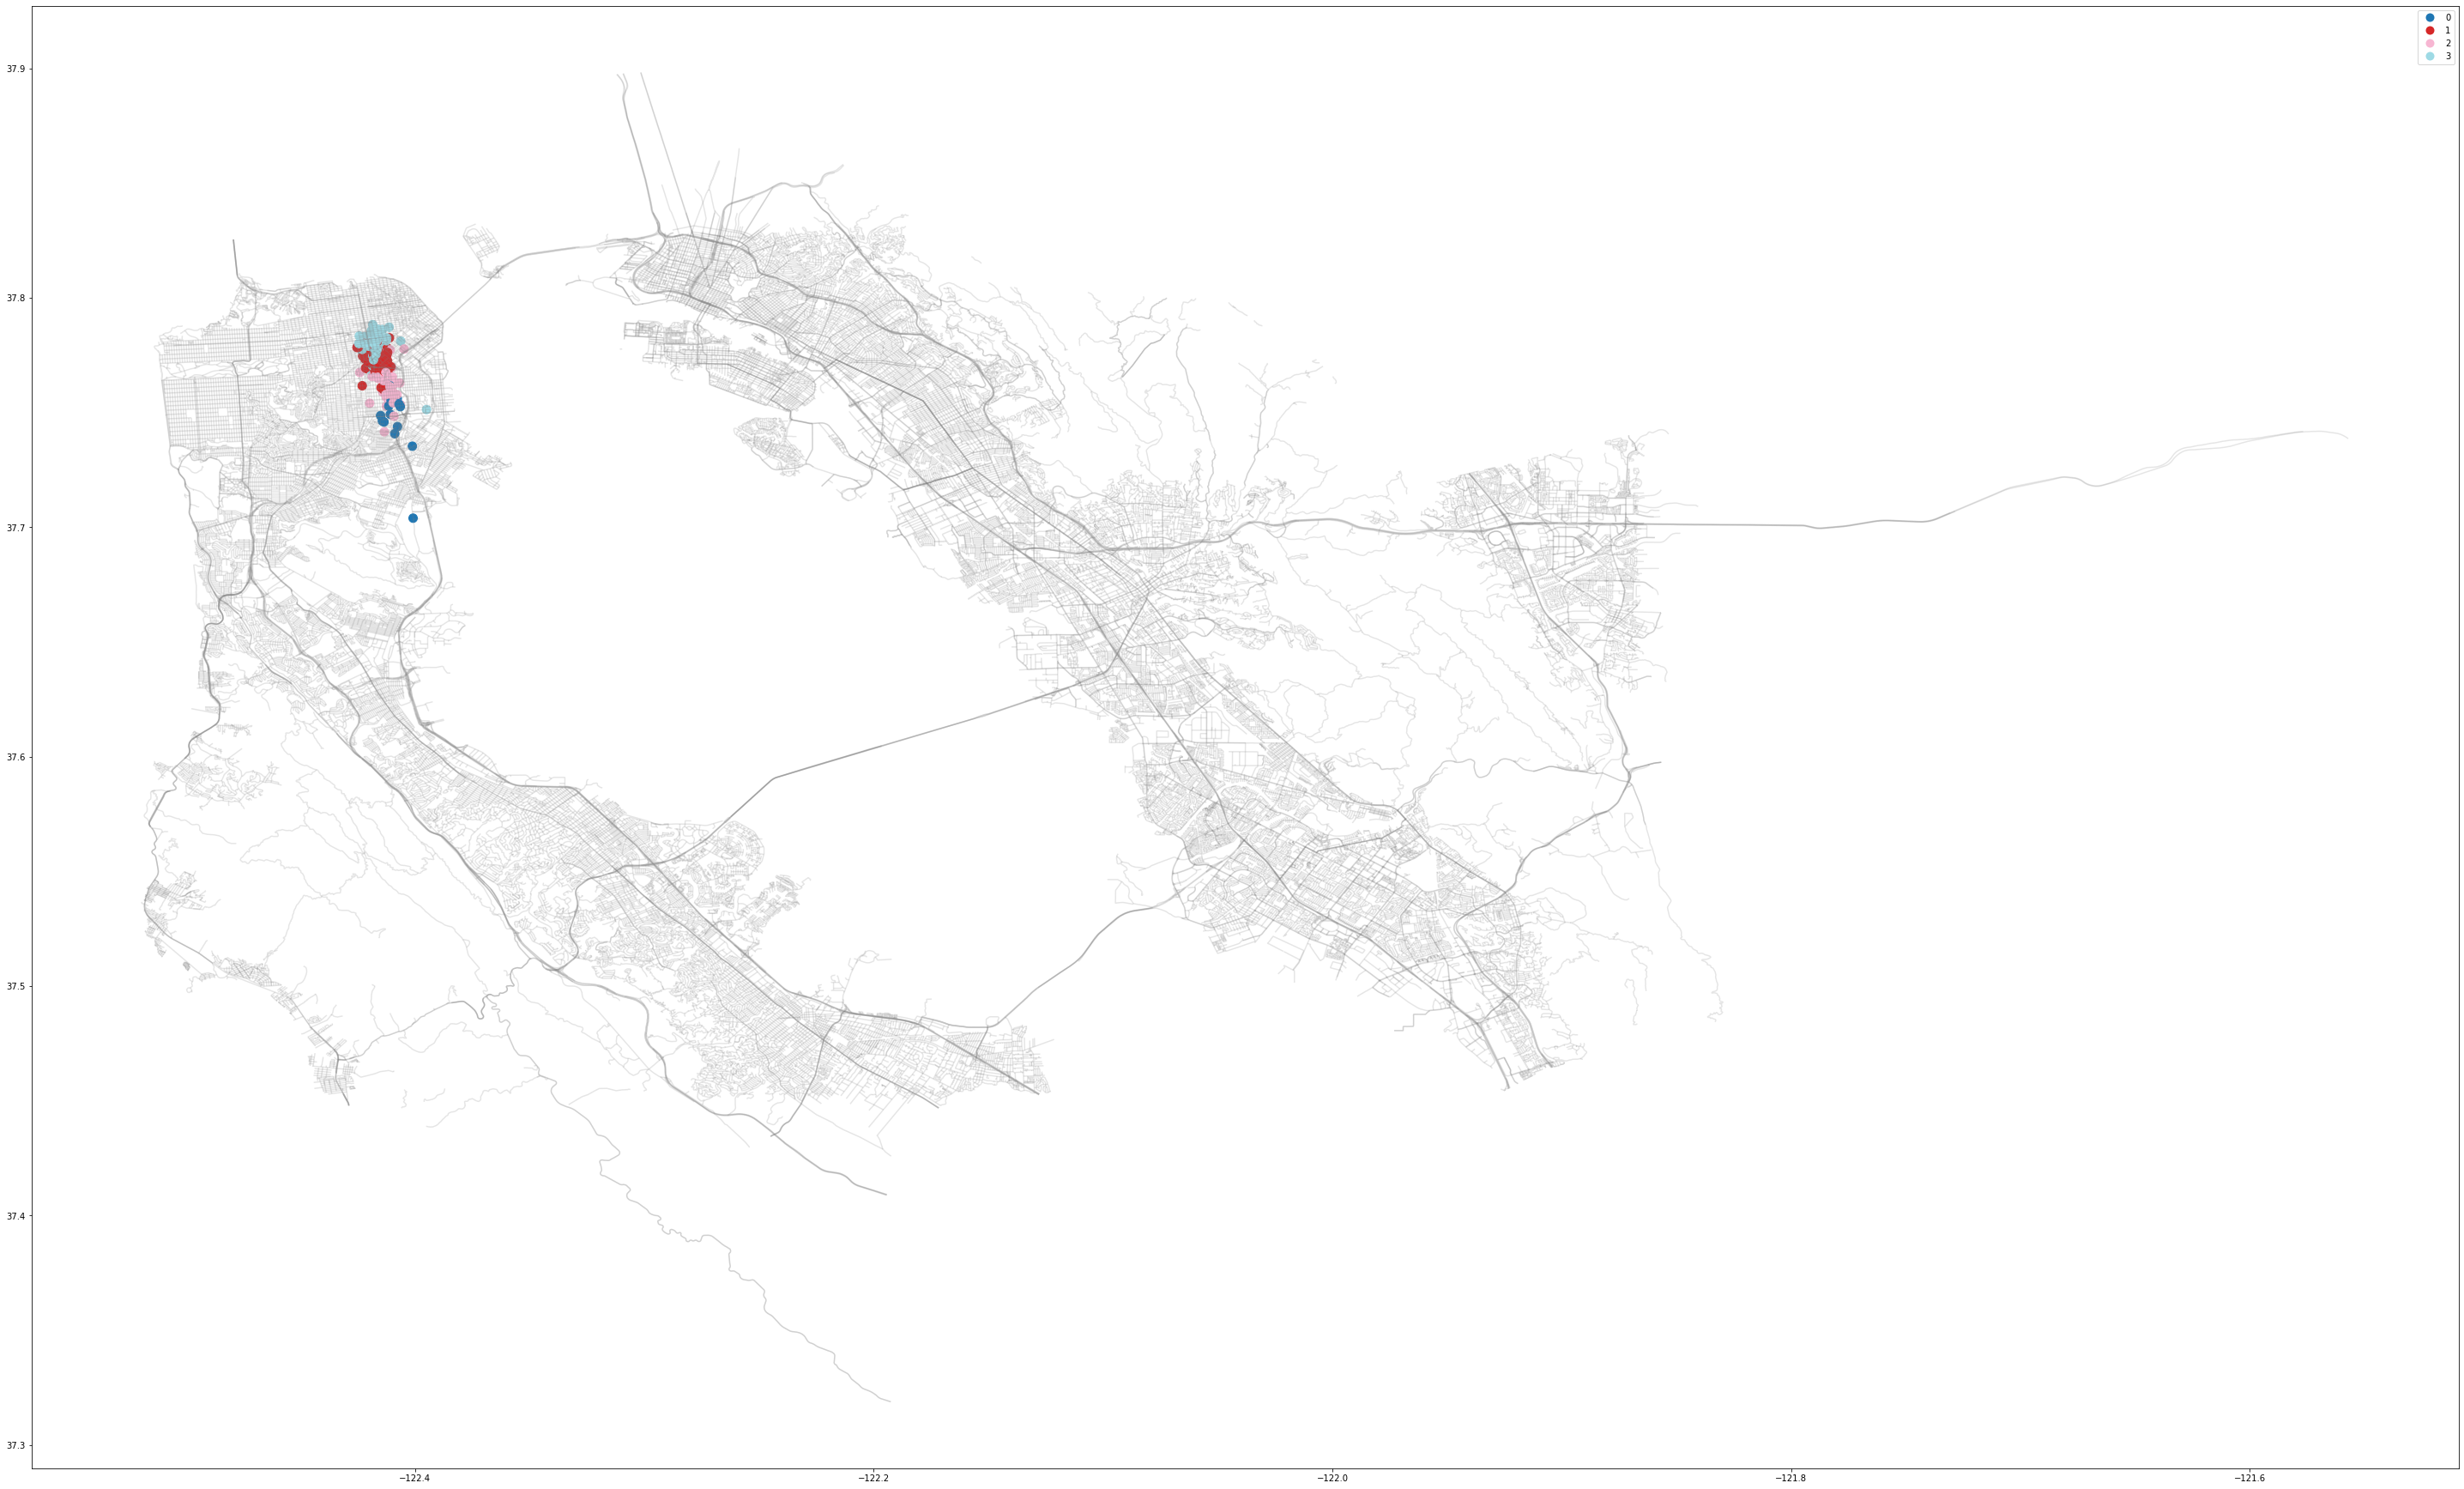

In [145]:
plt_map(df_ocupancy_0, "test33.jpg")

In [146]:
df_0 = df_ocupancy_0[["Latitude","Longitude","label","Cab_Name"]]

In [147]:
df_0.columns =["Latitude_1","Longitude_1","label","Cab_Name"]

In [148]:
df_0

,Latitude_1,Longitude_1,label,Cab_Name
0,37.774981,-122.416824,3,new_abboip.txt
1,37.772030,-122.415377,1,new_abcoij.txt
2,37.763451,-122.407015,2,new_abdremlu.txt
3,37.769745,-122.415651,3,new_abgibo.txt
4,37.773541,-122.414235,3,new_abjoolaw.txt
...,...,...,...,...
532,37.775805,-122.416693,3,new_uvburki.txt
533,37.777243,-122.417583,3,new_uvigcho.txt
534,37.765853,-122.412858,2,new_uvjeahot.txt
535,37.772379,-122.415946,3,new_uvjova.txt


C:\Users\Reset me please\Desktop\Vibhu_Assignment\utils.py:234: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  crs=CRS('EPSG:4326').to_proj4()


Plot


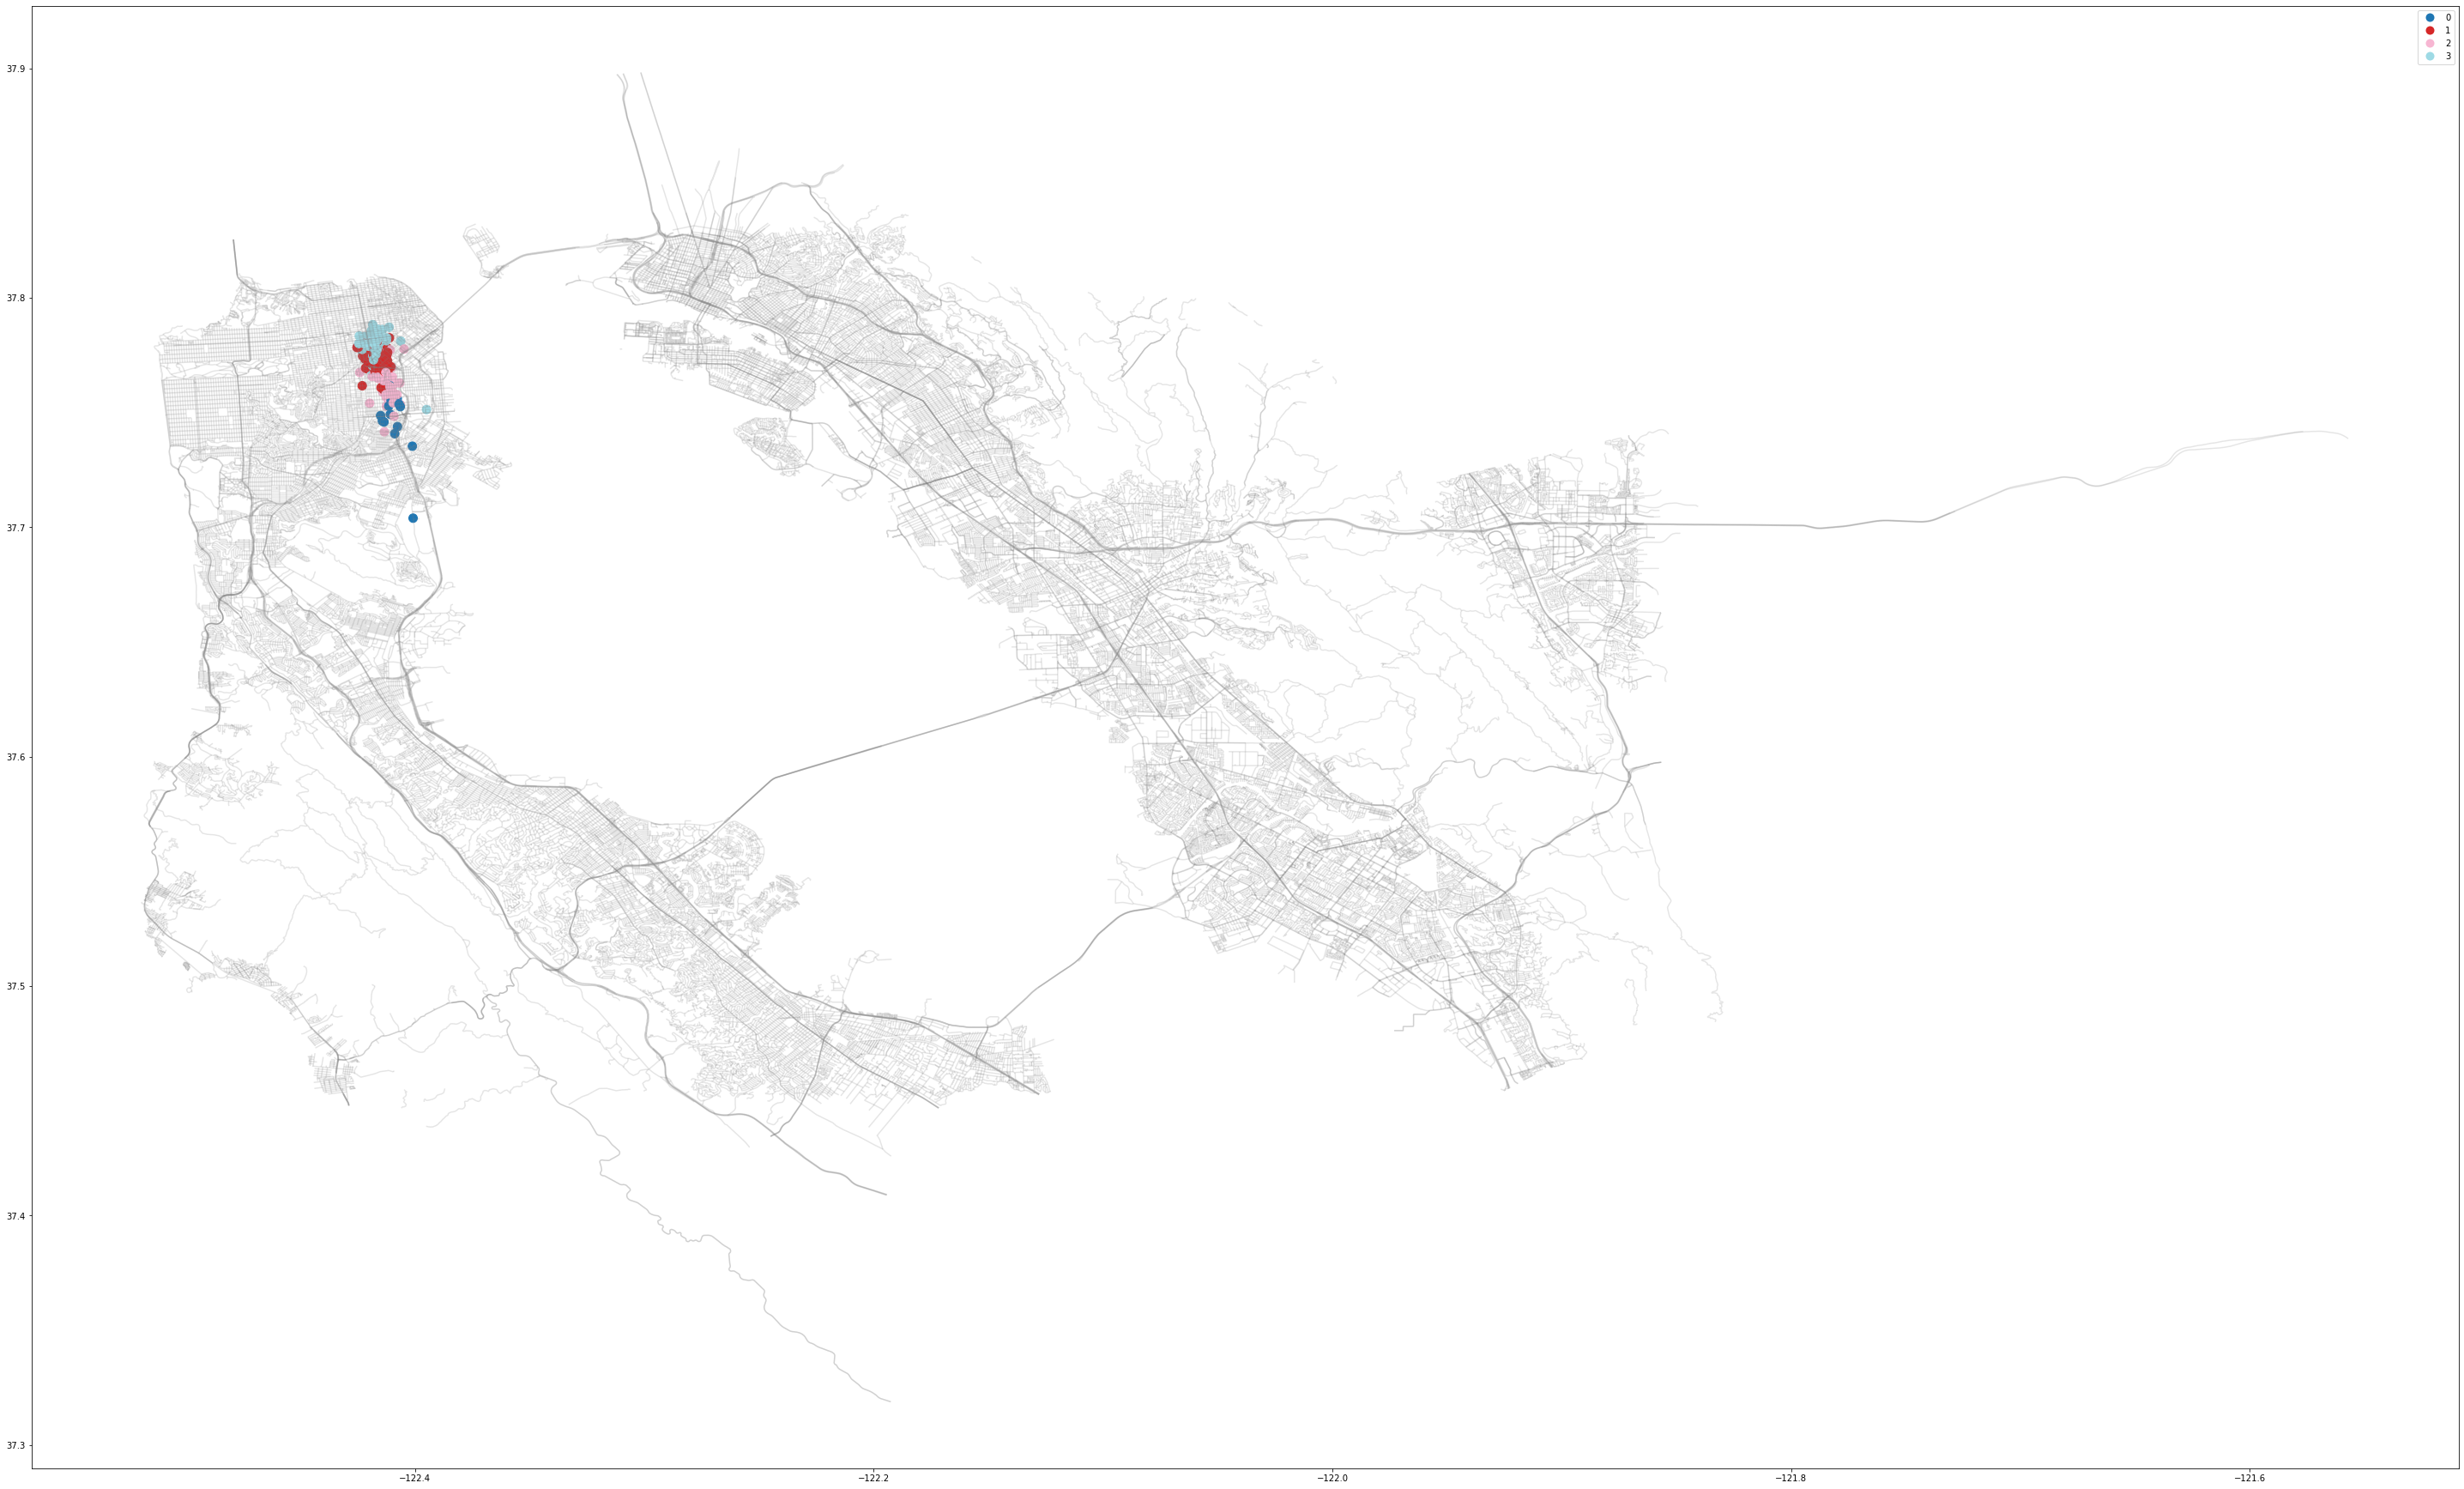

In [149]:
plt_map(df_ocupancy_0, "test34.jpg")

In [154]:
df_final_list = df_ocupancy_0[df_ocupancy_0["label"]==0]

In [157]:
df_final_list.drop(["label", "geometry"], axis=1, inplace=True)

C:\Vibhu\Python_Anaconda\envs\py37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [159]:
df_final_list.reset_index(inplace=True)

In [161]:
df_final_list.drop("index", axis=1, inplace=True)

C:\Vibhu\Python_Anaconda\envs\py37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [163]:
df_final_list.to_csv("Taxi_of_inters.csv")